Notebook to test dataset and dataloader

In [1]:
import numpy as np
from data.getlandmark import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from utils import *
from torch.utils.data import Dataset, DataLoader
# Get landmark using vocadataset.py
from data.vocaset import *

Get landmark using vocaset class!

In [2]:
train = vocadataset("val", landmark=True)
landmark, labels = train[0]

train_ = vocadataset("val", landmark=True, savelandmarks=True)
landmark, lab = train_[0]


[6, 11, 0, 4]
[6, 11, 0, 4]


In [4]:
landmark, labels = train[0]
landmark_, labels_ = train_[0]

In [6]:
dataloader = DataLoader(train, batch_size=1, collate_fn=collate_fn, shuffle=False)
dataloader_ = DataLoader(train_, batch_size=1,collate_fn=collate_fn, shuffle=False)


In [7]:
for i, (landmark_, lll, lab, ll) in enumerate(dataloader):
    print(landmark_.shape)
    if(i == 5):
        break



torch.Size([1, 219, 68, 3])
torch.Size([1, 232, 68, 3])
torch.Size([1, 358, 68, 3])
torch.Size([1, 267, 68, 3])
torch.Size([1, 308, 68, 3])
torch.Size([1, 348, 68, 3])


In [22]:
train_.landmarks.shape[0]

23745

In [8]:
for i, (landmark, lll, lab, ll) in enumerate(dataloader_):
    print(landmark.shape)
    if(i == 5):
        break

torch.Size([1, 219, 68, 3])
torch.Size([1, 232, 68, 3])
torch.Size([1, 358, 68, 3])
torch.Size([1, 267, 68, 3])
torch.Size([1, 308, 68, 3])
torch.Size([1, 348, 68, 3])


In [ ]:
landmark.shape

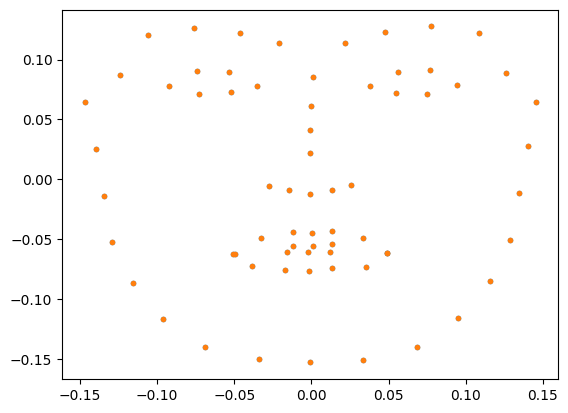

In [5]:
plt.scatter(landmark[0][:,0], landmark[0][:,1], marker='.')
plt.scatter(landmark_[0][:,0], landmark_[0][:,1], marker='.')
#plt.scatter(landmark[100][:,0], landmark[100][:,1], marker='.')

plt.show()

## Testing getOnly mouth landmark and plotting in 2D
### Get only mouth landmark

In [ ]:
test = vocadataset(type="test", landmark=True, mouthOnly=True)
landmark_mouth, labels = test[0]
plt.scatter(landmark_mouth[0][:,0], landmark_mouth[0][:,1], marker='.')
plt.scatter(landmark_mouth[10][:,0], landmark_mouth[10][:,1], marker='.')
plt.scatter(landmark_mouth[200][:,0], landmark_mouth[100][:,1], marker='.')
plt.show()

## Text dataloader 
#### The dataloader returns the *landmark*, original *landmark length* before padding, *labels* padded, and *label length* before padding

In [ ]:

testset = vocadataset("test", landmark=True)

dataloader = DataLoader(testset, batch_size=8, collate_fn=collate_fn, shuffle=True)

landmark, len_landmark, label, len_label = next(iter(dataloader))


## Test vertex plotting in 3D

In [ ]:
testset = vocadataset("test", landmark=False, mouthOnly=True)
dataloader = DataLoader(testset, batch_size=1, collate_fn=collate_fn, shuffle=True)

vertex,vertex_len ,lab, lab_len = next(iter(dataloader))
vertex_frame_0 = vertex[0][0]
pcshow(vertex_frame_0[:,0], vertex_frame_0[:,1], vertex_frame_0[:,2])


In [ ]:
vertex.shape

In [ ]:
import imageio
from PIL import Image

def create_gif(figures, filename, duration=0.5):
    images = []
    
    for fig in figures:
        # Create a temporary file to save the figure as an image
        temp_file = 'temp.png'
        fig.savefig(temp_file)
        
        # Open the temporary file using PIL
        image = Image.open(temp_file)
        images.append(image)
        
    # Save the images as a GIF using imageio
    imageio.mimsave(filename, images, duration=duration)
    
    # Remove the temporary file
    import os
    os.remove(temp_file)
    